In [1]:
%load_ext autoreload
%autoreload 2

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord

from EXPANSE import ResolvedGalaxy
from EXPANSE.utils import FieldInfo, PhotometryBandInfo

%matplotlib inline

### ID 2540 in JOF catalog.


In [2]:
from batch_fitsmap import main

field_info = main("JOF", "v11", ["ACS_WFC", "NIRCam"], 'austind', return_info=True, overwrite=True)

Processing JOF with version v11 and instruments ['ACS_WFC', 'NIRCam']
Auto detected weight path /raid/scratch/data/hst/JOF/ACS_WFC/mosaic_1084_wispnathan/30mas/ACS_WFC_F435W_JOF_wht.fits for band F435W.
Auto detected error path /raid/scratch/data/hst/JOF/ACS_WFC/mosaic_1084_wispnathan/30mas/rms_err/F435W_rms_err.fits for band F435W.
Auto detected segmentation path /raid/scratch/work/austind/GALFIND_WORK/SExtractor/ACS_WFC/v11/JOF/MAP_RMS/segmentation/JOF_F435W_F435W_sel_cat_v11_seg.fits for band F435W.
Auto detected PSF path /nvme/scratch/work/tharvey/PSFs/JOF/F435W_psf.fits for band F435W.
Auto detected PSF kernel path /nvme/scratch/work/tharvey/PSFs/kernels/JOF/F435W_kernel.fits for band F435W.
Auto detected image path /raid/scratch/data/hst/JOF/ACS_WFC/mosaic_1084_wispnathan/30mas/ACS_WFC_F435W_JOF_drz.fits for band F435W.
Auto detected zero point 25.68 with keyword ZEROPNT for band F435W.
Auto detected unit ELECTRONS/S with keyword BUNIT for band F435W.
Both zero point and unit fou

In [3]:
print(field_info)

Field Info for Survey: JOF
Detection Band: F277W+F356W+F444W

Band    Instrument  Pixel Scale   ZP/Unit  PSF Matched  PSF Type    Err  Wht  Seg  PSF  PSF Kernel  Auto Phot  Aper Phot  
--------------------------------------------------------------------------------------------------------------------------
F435W   auto        0.030 arcsec  25.68    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F606W   auto        0.030 arcsec  26.51    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F775W   auto        0.030 arcsec  25.69    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F814W   auto        0.030 arcsec  25.94    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F850LP  auto        0.030 arcsec  24.87    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F090W   auto        0.030 arcsec  28.087   No           star_stack  Yes  Yes 

In [27]:
galaxy_id = '2540'
survey = 'JOF'
cutout_size = 250 # pixels
position = SkyCoord(53.04430488141871*u.deg, -27.895251706823906*u.deg, frame='icrs')
redshift = 1.02

galaxy = ResolvedGalaxy.init_from_basics(galaxy_id = galaxy_id,
                                        field_info = field_info,
                                        survey = survey,
                                        cutout_size=cutout_size,
                                        sky_coord=position,
                                        redshift=redshift,
                                        overwrite=True)

galaxy = ResolvedGalaxy.init_from_h5("JOF_2540.h5")

deleting existing .h5 file.


In [25]:
galaxy

Resolved Galaxy 2540 from JOF survey
SkyCoord: <SkyCoord (ICRS): (ra, dec) in deg
    (53.04430488, -27.89525171)>
Bands: ['F435W', 'F606W', 'F775W', 'F814W', 'F850LP', 'F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
Cutout size: 250
Aperture photometry: {}

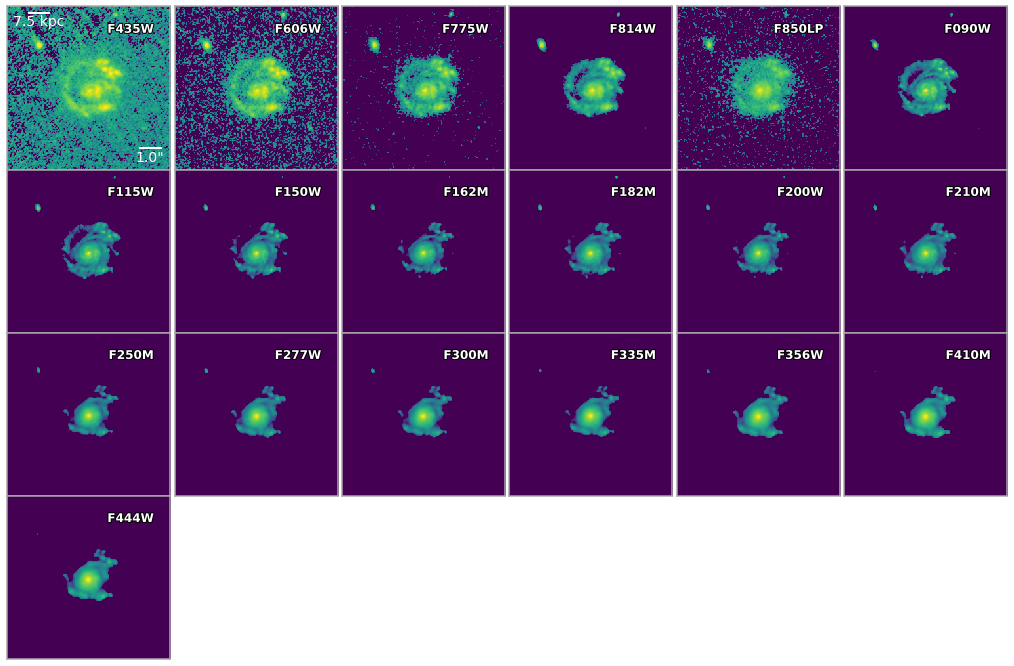

In [36]:
galaxy.plot_cutouts()

plt.show()

In [49]:
galaxy.pixel_by_pixel_galaxy_region(mask='seg_det', smooth=True, overwrite=True)

 added to <HDF5 file "JOF_2540.h5" (mode r+)>, galaxy_region, SNR_5_F444W


In [51]:
galaxy.pixel_by_pixel_binmap(overwrite=True)

 added to <HDF5 file "JOF_2540.h5" (mode r+)>, bin_maps, pixel_by_pixel
Setting pixel_by_pixel_map attribute.


In [53]:
galaxy.measure_flux_in_bins(overwrite=True)

False
  ID  type ...         F444W                F444W_err       
           ...          uJy                    uJy          
----- ---- ... ---------------------- ----------------------
    1  bin ... 0.00011824282851928738 2.2824446205049753e-05
    2  bin ... 0.00013335264817665202 2.2836604330223054e-05
    3  bin ... 0.00012797423064825054 2.2929516489966772e-05
    4  bin ... 0.00011620529187395574  2.277677776874043e-05
    5  bin ... 0.00011318924441369118 2.3113712813938037e-05
    6  bin ...  0.0001264978734819525 2.3287655494641513e-05
    7  bin ... 0.00012081064665476686 2.3129716282710433e-05
    8  bin ... 0.00010543934656230184  2.296270031365566e-05
    9  bin ... 0.00012146674552197199 2.2957417968427762e-05
  ...  ... ...                    ...                    ...
20482  bin ... 0.00012324506089533634 2.3491755200666375e-05
20483  bin ... 0.00010889749475795273  2.358829260629136e-05
20484  bin ...  8.977067529455511e-05 2.3522728952229954e-05
20485  bin ...  0.

ID,type,F435W,F435W_err,F606W,F606W_err,F775W,F775W_err,F814W,F814W_err,F850LP,F850LP_err,F090W,F090W_err,F115W,F115W_err,F150W,F150W_err,F162M,F162M_err,F182M,F182M_err,F200W,F200W_err,F210M,F210M_err,F250M,F250M_err,F277W,F277W_err,F300M,F300M_err,F335M,F335M_err,F356W,F356W_err,F410M,F410M_err,F444W,F444W_err
,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
str9,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,bin,2.896550267414812e-05,0.00011858227243783343,-4.5530206812064035e-05,0.002813947528953396,-7.283331145687177e-05,0.0031679547137335295,7.517816422706579e-05,0.001689639897664958,-6.009213584709587e-05,0.007488372938252518,8.27296279197277e-05,6.091391595378085e-05,8.488968881211635e-05,5.162148428342588e-05,0.00010987701070978067,5.0357363413338836e-05,6.812539416261282e-05,5.751053501982239e-05,8.870201517943391e-05,3.3031345652661335e-05,0.00010131742660612806,5.008524394169182e-05,0.00010133236256444408,4.13220845680284e-05,8.228750247117466e-05,1.7620914949655574e-05,0.00018154738462661403,1.715137706976697e-05,0.00011985536003464504,1.3798905662964188e-05,0.00012669203363618824,1.3991992505877482e-05,0.00014927451991994246,1.7714859980114844e-05,8.252714960059124e-05,2.760506067611343e-05,0.00011824282851928738,2.2824446205049753e-05
2,bin,3.656565302018934e-05,0.00011831185021456139,-2.931593802905622e-05,0.002788230233426918,-5.659922948997337e-05,0.0031587487304617573,7.495239512101448e-05,0.0016904132399984727,-1.941305064069513e-05,0.007522948716998889,7.794297949035108e-05,6.073557128479261e-05,9.157204461953343e-05,5.160712745136014e-05,0.00010870495103634863,5.0396578535126486e-05,7.23670869833701e-05,5.749206366073838e-05,9.367882789452586e-05,3.3018868462586616e-05,0.00010531798939577154,5.0011490879228425e-05,0.00010436005856040171,4.132554148735645e-05,9.403658419704783e-05,1.7703408950035117e-05,0.00019460815728540118,1.722121075467772e-05,0.00012370995739755897,1.3798479405698542e-05,0.0001340639552398297,1.3972030381250713e-05,0.00015121925605466346,1.7683314668679493e-05,9.735881077738288e-05,2.7385027568102047e-05,0.00013335264817665202,2.2836604330223054e-05
3,bin,4.133444179437099e-05,0.00011789681331676014,-5.9575414864497195e-06,0.0027772247110127114,-5.217256250728102e-05,0.0031528794438506766,8.036340357387532e-05,0.0016882163481597092,-3.4858926296983165e-05,0.007568817111859062,7.214406648619058e-05,6.0573166245464285e-05,9.669016793623772e-05,5.163083791247292e-05,0.00010878359267725099,5.042534853119426e-05,8.071059154767535e-05,5.7487840072948434e-05,9.953089343737113e-05,3.30196243231518e-05,0.00011032802527791011,4.99123021896119e-05,0.00010589644746395156,4.133918163526252e-05,0.00010155635640600599,1.7720552090120758e-05,0.0002033821822530999,1.7302345645661156e-05,0.00012263253847259506,1.3787783705325335e-05,0.00013889781069708254,1.3977804327140033e-05,0.00013872338658730518,1.765166986054745e-05,9.761541099210635e-05,2.717809186201761e-05,0.00012797423064825054,2.2929516489966772e-05
4,bin,4.119160361106268e-05,0.00011725232674610219,1.3737021716935309e-05,0.002778599340559508,-5.034120926287603e-05,0.003151044997406861,8.247392178434554e-05,0.0016827517351142394,-4.937591671141926e-05,0.007610340828707672,6.90298641930131e-05,6.048403578972207e-05,0.0001012732460124024,5.167514222061626e-05,0.00010952506663452177,5.040609265042945e-05,8.891016509198204e-05,5.752676858156007e-05,0.00010408177697244176,3.3036038548660236e-05,0.00011096853503040881,4.9828241176421503e-05,0.0001096199729848133,4.138789970883977e-05,0.00010583039893694757,1.7706699399506385e-05,0.00020541116640917769,1.736117844296683e-05,0.0001198185